$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
from Uniandes_Framework.heatmaps_utilities import heatmaps_functions

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
!wget https://github.com/Joacop16/Heatmap_Utilities/blob/main/Data_1.csv

--2023-07-22 01:39:23--  https://github.com/Joacop16/Heatmap_Utilities/blob/main/Data_1.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5178 (5.1K) [text/plain]
Saving to: ‘Data_1.csv.5’

Data_1.csv.5        100%[===================>]   5.06K  --.-KB/s    in 0s      

2023-07-22 01:39:24 (16.9 MB/s) - ‘Data_1.csv.5’ saved [5178/5178]



**1. Read .csv file:**

The first thing that we need to do is read the .csv file that contains the matrix that we want to plot. To do this we can use the function **heatmaps_functions.read_csv()**

In [4]:
data = heatmaps_functions.read_csv('Data_1.csv')

In [5]:
data

,250.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,2250.0,2500.0
3.00,564.500,19.0600,1.99800,0.344400,0.078620,0.021410,0.006597,0.002220,0.000798,0.000300
2.50,392.900,13.1800,1.38700,0.240700,0.054510,0.014890,0.004566,0.001541,0.000553,0.000210
2.00,250.900,8.4490,0.88960,0.153400,0.034900,0.009509,0.002923,0.000985,0.000354,0.000134
1.50,141.200,4.7490,0.49850,0.085600,0.019750,0.005363,0.001644,0.000554,0.000199,0.000075
1.00,62.810,2.1060,0.22170,0.038180,0.008740,0.002386,0.000731,0.000245,0.000089,0.000033
0.50,15.720,0.5278,0.05548,0.009582,0.002184,0.000595,0.000183,0.000062,0.000022,0.000008
0.25,3.929,0.1312,0.01380,0.002390,0.000547,0.000148,0.000046,0.000015,0.000006,0.000002


We can use seaborn to plot the heatmap of data:

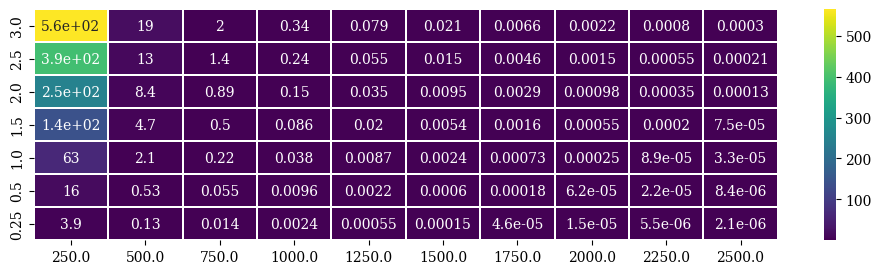

In [6]:
fig = plt.figure(figsize = (12,3))
sns.heatmap(data, cmap ='viridis', linewidths = 0.2, annot = True)
plt.show()

If we want to interpolate between each point of the grid to plot something more smooth, we can use the function **heatmaps_functions.smooth()**. This function has two parameters:

- Data*: DataFrame with the data, each entry refers to the value of a variable based on the column and row values. For example, if we consider two independent variables A, B and a function F(A,B), Data is a matrix where the rows take the values of A and the columns the values of B, i.e. each entry in the matrix will be just F(A,B).    
- log: Boolean that says if we will work with logarithmic scale (base 10).

In [7]:
data_int = heatmaps_functions.smooth(data)

In [8]:
data_int

,250.000000,254.509018,259.018036,263.527054,268.036072,272.545090,277.054108,281.563126,286.072144,290.581162,...,2459.418838,2463.927856,2468.436874,2472.945892,2477.454910,2481.963928,2486.472946,2490.981964,2495.490982,2500.000000
3.000000,564.500000,551.935799,539.376921,526.828691,514.296431,501.785465,489.301117,476.848710,464.433567,452.061013,...,0.001196,0.001100,0.001003,0.000905,0.000806,0.000706,0.000605,0.000504,0.000402,0.000300
2.994489,562.541480,549.983539,537.416446,524.861627,512.324405,499.810104,487.324047,474.871557,462.457959,450.088576,...,0.001205,0.001109,0.001011,0.000912,0.000811,0.000710,0.000608,0.000505,0.000402,0.000299
2.988978,560.583009,548.061191,535.488581,522.927839,510.386321,497.869351,485.382251,472.930345,460.518958,448.153412,...,0.001214,0.001116,0.001017,0.000917,0.000815,0.000713,0.000609,0.000505,0.000401,0.000298
2.983467,558.624635,546.145305,533.591912,521.025913,508.480765,495.961791,483.474314,471.023659,458.615147,446.254104,...,0.001221,0.001123,0.001023,0.000921,0.000819,0.000715,0.000610,0.000505,0.000400,0.000297
2.977956,556.666409,544.229605,531.717407,519.154434,506.606322,494.086010,481.598823,469.150083,456.745114,444.389240,...,0.001228,0.001128,0.001027,0.000925,0.000821,0.000716,0.000610,0.000503,0.000398,0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.272044,4.833451,4.712148,4.593820,4.477786,4.361214,4.243720,4.126632,4.010841,3.896357,3.783190,...,0.000151,0.000138,0.000124,0.000110,0.000095,0.000078,0.000060,0.000041,0.000021,0.000003
0.266533,4.606991,4.488380,4.372739,4.257519,4.141474,4.026223,3.912277,3.799646,3.688448,3.579036,...,0.000147,0.000134,0.000120,0.000106,0.000091,0.000075,0.000059,0.000040,0.000021,0.000002
0.261022,4.380828,4.264870,4.150781,4.036176,3.922649,3.810437,3.699866,3.591135,3.484224,3.379115,...,0.000144,0.000130,0.000116,0.000102,0.000087,0.000072,0.000056,0.000039,0.000021,0.000002
0.255511,4.154864,4.041206,3.928035,3.816205,3.706202,3.598064,3.491771,3.387307,3.284651,3.183786,...,0.000142,0.000129,0.000115,0.000100,0.000085,0.000070,0.000054,0.000037,0.000020,0.000002


Now, we have a matrix of 500x500. Now we could plot the heatmap using seaborn. However, It can also do it with the function **heatmaps_functions.plot_heatmap()**: 

(<Figure size 640x480 with 2 Axes>, <Axes: >, 0)

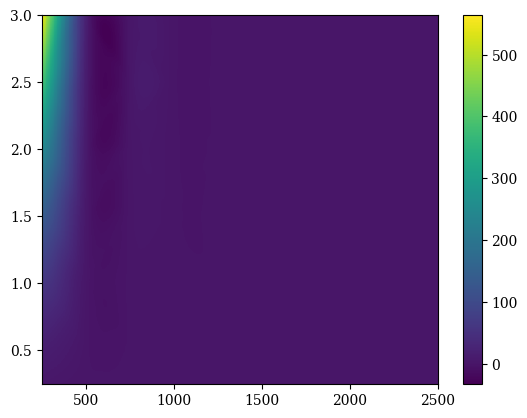

In [9]:
heatmaps_functions.plot_heatmap(data_int)

In some cases is useful to work with a logarithmic scale. So,

In [10]:
data_int = heatmaps_functions.smooth(data, log = True)

(<Figure size 640x480 with 2 Axes>, <Axes: >, 0)

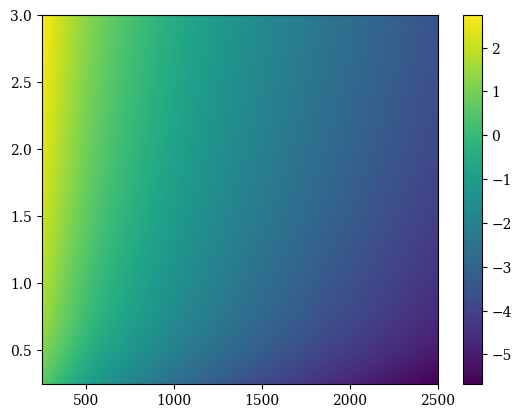

In [11]:
heatmaps_functions.plot_heatmap(data_int)

In addition to this **heatmaps_functions.plot_heatmap()** has a lot of useful parameters to set labels, plots contour lines, or zoom_regions if the user wants it. Let us show the utility of each one: 

- level_curves: It is a Directory that contains the level curves to be plotted. It must have the structure {value (float): label(string}) and its label.

(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.contour.QuadContourSet at 0x7fda445d3820>)

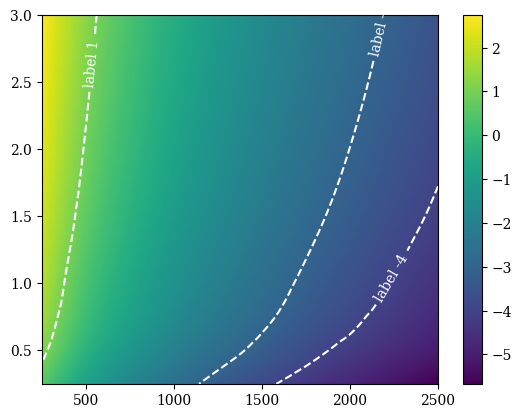

In [12]:
heatmaps_functions.plot_heatmap(data_int, level_curves = {-3: 'label -3', -4: 'label -4', 1: 'label 1'})

Here we can not see well the label of the -3 level curve. To fix this type of problem we can use the next parameter.

- level_curves_labels_locations: List with suggested coordinates [(x1,y1), (x2,y2),...] of the positions where you want the signs of each level curve to be (The order does not matter).

(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.contour.QuadContourSet at 0x7fda444495e0>)

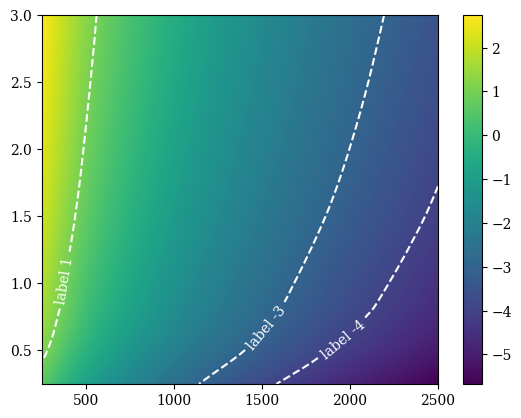

In [13]:
heatmaps_functions.plot_heatmap(data_int, 
                                level_curves = {-3: 'label -3', -4: 'label -4', 1: 'label 1'}, 
                                level_curves_labels_locations = [(500,1), (2000, 0.5), (1500,0.7)])

- zoom_region: Directory that contains the positions of the region to be zoomed. It must have the structure {x1 (string): value (float), x2 (string): value (float), y1 (string): value (float), y2 (string): value (float)}.

(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.contour.QuadContourSet at 0x7fda4433f310>)

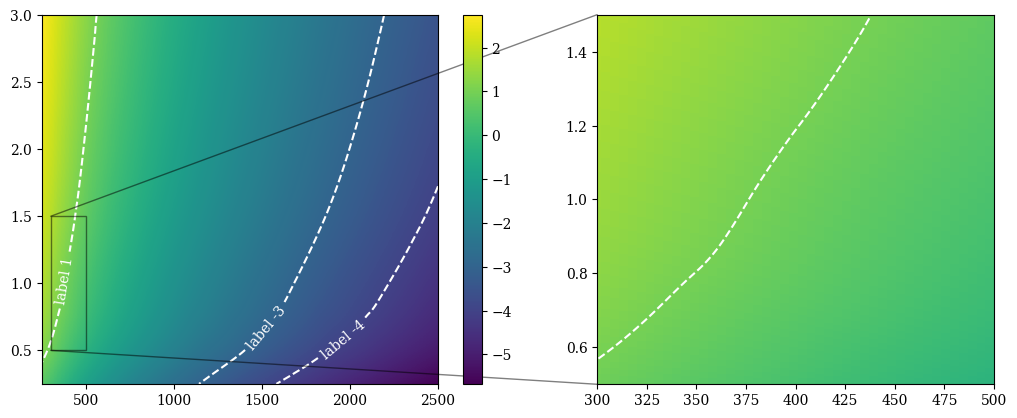

In [14]:
heatmaps_functions.plot_heatmap(data_int, 
                                level_curves = {-3: 'label -3', -4: 'label -4', 1: 'label 1'}, 
                                level_curves_labels_locations = [(500,1), (2000, 0.5), (1500,0.7)],
                                zoom_region = {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5})

These are the main parameters. However, the function read **kwargs like title, title_right, title_left, x_label, y_label, cbar_label, color, File_name, etc. to edit the labels or save the plot.

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'left': 'title_left', 'center': 'title', 'right': 'title_right'}, xlabel='x_label', ylabel='y_label'>,
 <matplotlib.contour.QuadContourSet at 0x7fda0f69f460>)

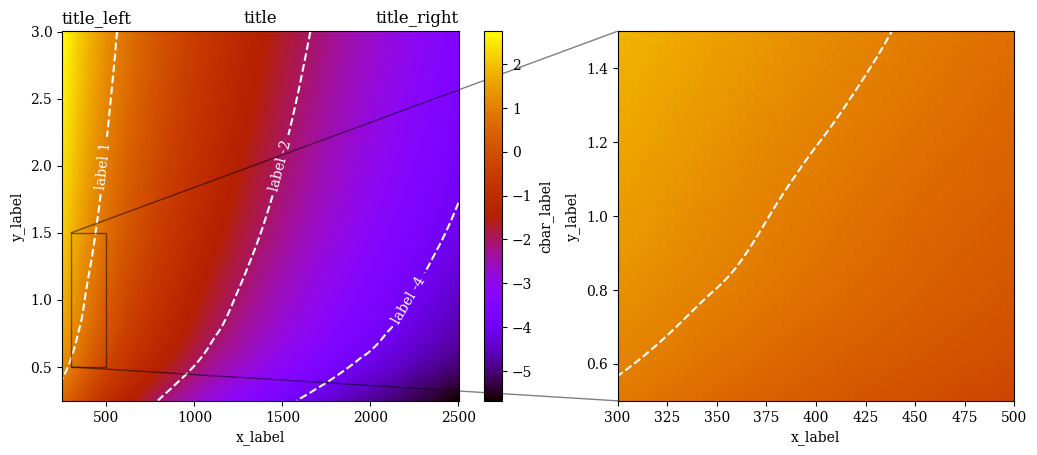

In [15]:
heatmaps_functions.plot_heatmap(data_int, 
                                level_curves= {1 : 'label 1', -2: 'label -2', -4 : 'label -4'}, 
                                level_curves_labels_locations = [(500,2), (1500, 2), (2220, 1)],
                                zoom_region= {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5}, 
                                title = 'title', 
                                title_right = 'title_right', 
                                title_left = 'title_left',             
                                x_label = 'x_label',
                                y_label =  'y_label',
                                cbar_label = 'cbar_label',
                                color = 'gnuplot',
                                File_name = 'grafica.png')

The function also returns three objects to edit other things in case you want:

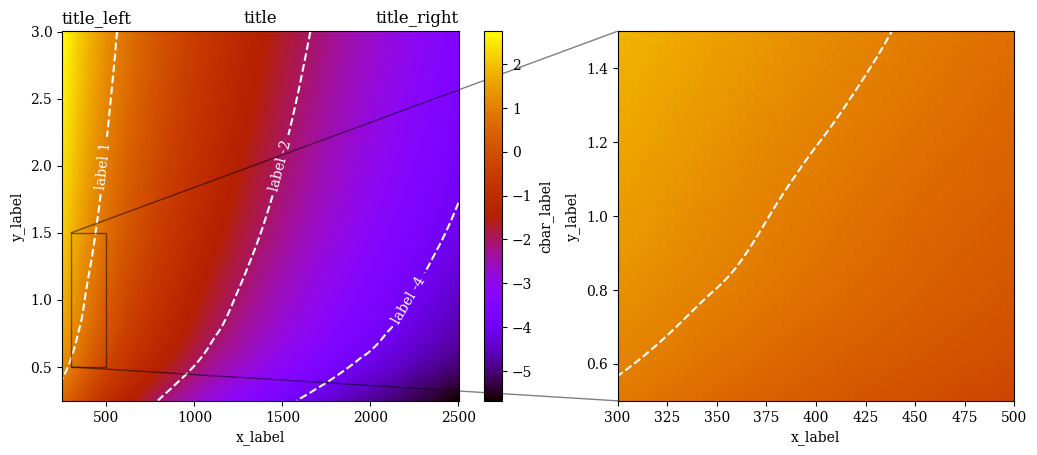

In [16]:
fig, ax, curves = heatmaps_functions.plot_heatmap(data_int, 
                                level_curves= {1 : 'label 1', -2: 'label -2', -4 : 'label -4'}, 
                                level_curves_labels_locations = [(500,2), (1500, 2), (2220, 1)],
                                zoom_region= {'x1': 300, 'y1': 0.5, 'x2': 500, 'y2': 1.5}, 
                                title = 'title', 
                                title_right = 'title_right', 
                                title_left = 'title_left',             
                                x_label = 'x_label',
                                y_label =  'y_label',
                                cbar_label = 'cbar_label',
                                color = 'gnuplot',
                                File_name = 'grafica.png')

Fig, ax correspond to matplotlib.pyplot subplots, and curves to the matplotlib.pyplot.contours. For example, if we want the (x,y) coordinates of each curve it is enough to analyze curves:

In [17]:
#Curve of 1
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])

#Curve of -2
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])

#Curve of -4
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])

(0.25, 3.0)

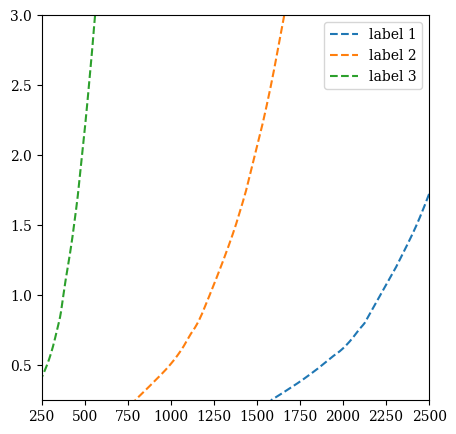

In [18]:
fig = plt.figure(figsize = (5,5))

plt.plot(x1,y1, linestyle = '--', label = 'label 1')
plt.plot(x2,y2, linestyle = '--', label = 'label 2')
plt.plot(x3,y3, linestyle = '--', label = 'label 3')

plt.legend(loc = 'best')
plt.xlim(250, 2500)
plt.ylim(0.25,3)